In [1]:
import torch
from src.trainer import FatigueTrainer
import matplotlib.pyplot as plt
from tabensemb.utils.utils import global_palette, global_marker

device = "cuda" if torch.cuda.is_available() else "cpu"

configfile = "composite_test"
trainer = FatigueTrainer(device=device, project="analyse")
trainer.load_config(
    configfile,
    manual_config={
        "database": "composite_database_07242023",
        "data_splitter": "RandomSplitter",
    },
)
trainer.load_data()

The project will be saved to output/analyse/2023-09-19-20-01-53-0_composite_test
Dataset size: 4062 1354 1354
Data saved to output/analyse/2023-09-19-20-01-53-0_composite_test (data.csv and tabular_data.csv).


# Analyse the dataset

## Filling rate

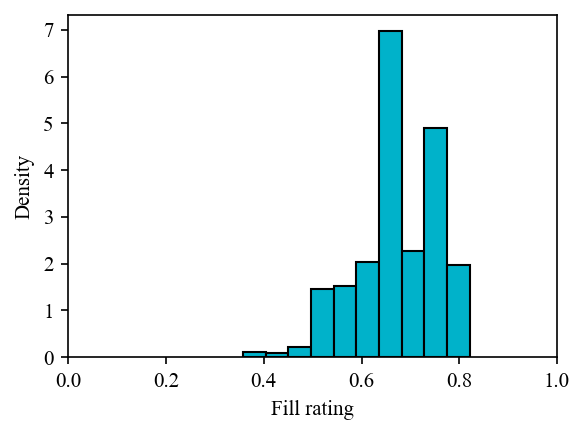

<AxesSubplot:xlabel='Fill rating', ylabel='Density'>

In [2]:
trainer.plot_fill_rating(figure_kwargs=dict(figsize=(4,3), dpi=150))

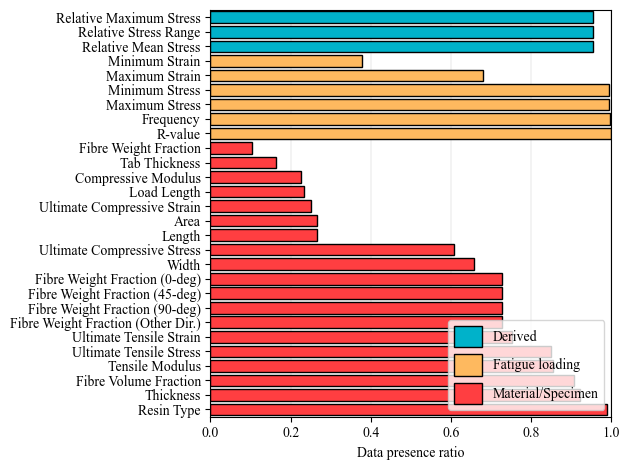

<AxesSubplot:xlabel='Data presence ratio'>

In [3]:
trainer.plot_presence_ratio(order="type")

## PCA

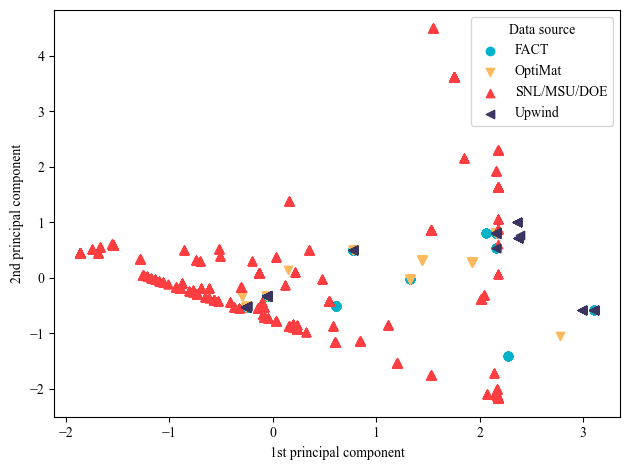

<AxesSubplot:xlabel='1st principal component', ylabel='2nd principal component'>

In [4]:
trainer.plot_pca_2d_visual(category="Data source", features=["Fibre Weight Fraction (0-deg)", "Fibre Weight Fraction (45-deg)", "Fibre Weight Fraction (90-deg)", "Fibre Weight Fraction (Other Dir.)"])

## One against another

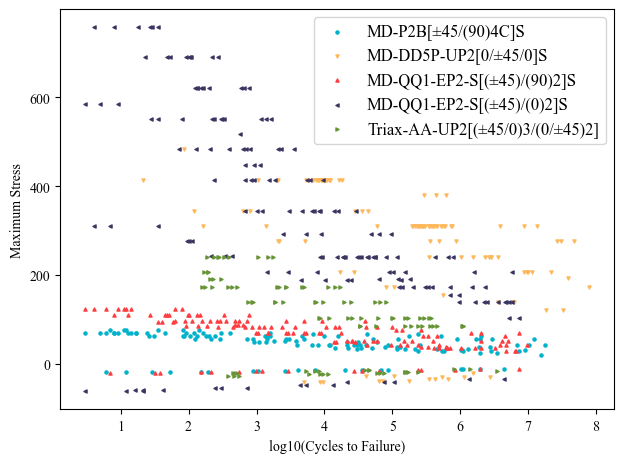

<AxesSubplot:xlabel='log10(Cycles to Failure)', ylabel='Maximum Stress'>

In [5]:
mcodes = ["MD-P2B[±45/(90)4C]S", "MD-DD5P-UP2[0/±45/0]S", "MD-QQ1-EP2-S[(±45)/(90)2]S", "MD-QQ1-EP2-S[(±45)/(0)2]S", "Triax-AA-UP2[(±45/0)3/(0/±45)2]"]

meth_kwargs_ls = [dict(
            select_by_value_kwargs={
                "selection": {"Material_Code": mcode}
            },
            scatter_kwargs={
                "color": global_palette[idx],
                "s": 5,
                "marker": global_marker[idx],
                "label": mcode,
            },
        ) for idx, mcode in enumerate(mcodes)]

trainer.plot_on_one_axes(
    meth_name="plot_scatter",
    meth_kwargs_ls=meth_kwargs_ls,
    meth_fix_kwargs=dict(
        x_col="log10(Cycles to Failure)",
        y_col="Maximum Stress",
        imputed=False,
    ),
    save_show_close=True,
    xlabel="log10(Cycles to Failure)",
    ylabel="Maximum Stress",
    legend=True,
)

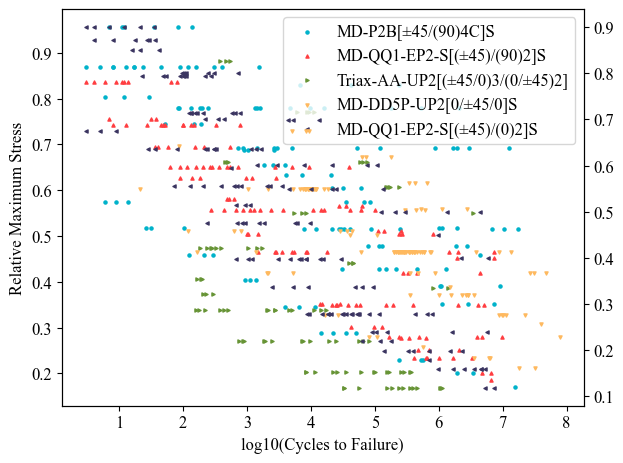

<AxesSubplot:xlabel='log10(Cycles to Failure)', ylabel='Relative Maximum Stress'>

In [6]:
trainer.plot_on_one_axes(
    meth_name="plot_scatter",
    meth_kwargs_ls=meth_kwargs_ls,
    meth_fix_kwargs=dict(
        x_col="log10(Cycles to Failure)",
        y_col="Relative Maximum Stress",
        imputed=False,
    ),
    save_show_close=True,
    xlabel="log10(Cycles to Failure)",
    ylabel="Relative Maximum Stress",
    legend=True,
    twin=True,
)

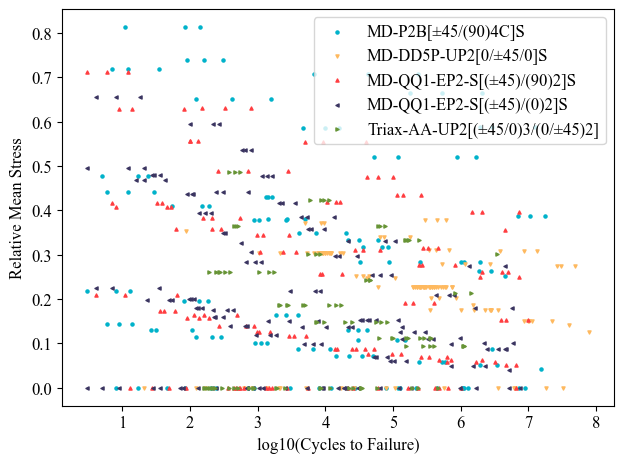

<AxesSubplot:xlabel='log10(Cycles to Failure)', ylabel='Relative Mean Stress'>

In [7]:
trainer.plot_on_one_axes(
    meth_name="plot_scatter",
    meth_kwargs_ls=meth_kwargs_ls,
    meth_fix_kwargs=dict(
        x_col="log10(Cycles to Failure)",
        y_col="Relative Mean Stress",
        imputed=False,
    ),
    save_show_close=True,
    xlabel="log10(Cycles to Failure)",
    ylabel="Relative Mean Stress",
    legend=True,
)

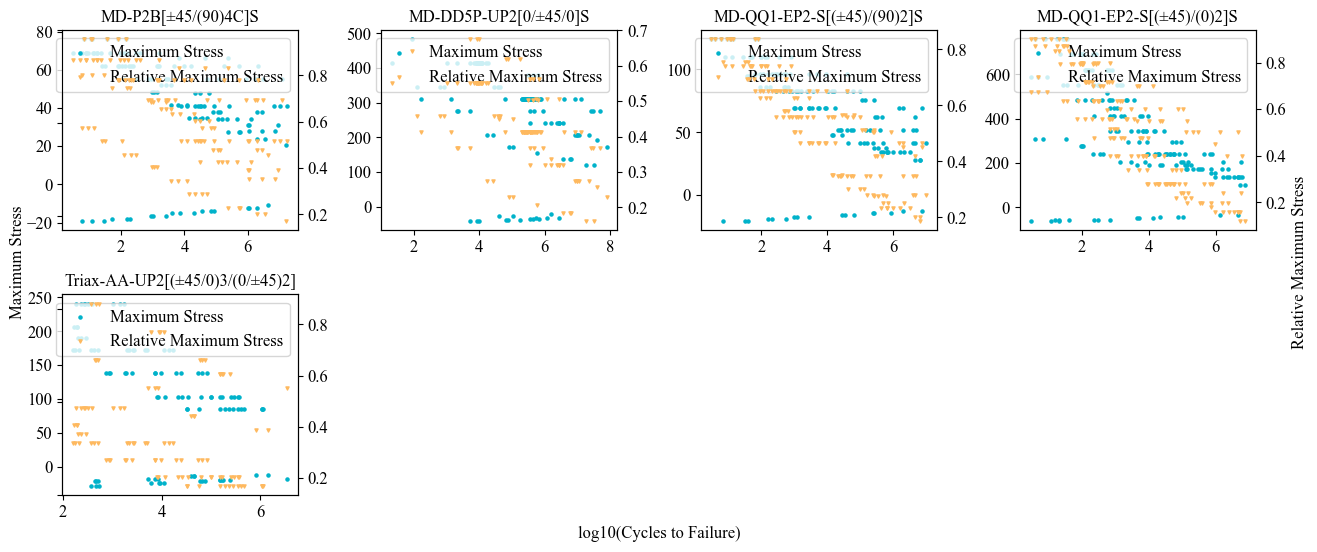

In [22]:
mcodes = ["MD-P2B[±45/(90)4C]S", "MD-DD5P-UP2[0/±45/0]S", "MD-QQ1-EP2-S[(±45)/(90)2]S", "MD-QQ1-EP2-S[(±45)/(0)2]S",
          "Triax-AA-UP2[(±45/0)3/(0/±45)2]"]
_ = trainer.plot_subplots(
    ls=[
        [
            dict(
                select_by_value_kwargs={"selection": {"Material_Code": mcode}},
                scatter_kwargs={
                    "color": global_palette[0],
                    "s": 5,
                    "marker": global_marker[0],
                    "label": mcode,
                },
                y_col="Maximum Stress",
            ),
            dict(
                select_by_value_kwargs={"selection": {"Material_Code": mcode}},
                scatter_kwargs={
                    "color": global_palette[1],
                    "s": 5,
                    "marker": global_marker[1],
                    "label": mcode,
                },
                y_col="Relative Maximum Stress",
            ),
        ]
        for mcode in mcodes
    ],
    ls_kwarg_name="meth_kwargs_ls",
    meth_name="plot_on_one_axes",
    with_title=True,
    titles=mcodes,
    meth_fix_kwargs=dict(
        meth_name="plot_scatter",
        meth_fix_kwargs=dict(
            x_col="log10(Cycles to Failure)",
            imputed=False,
        ),
        save_show_close=True,
        # ylabel="Maximum Stress",
        # twin_ylabel="Relative Maximum Stress",
        twin=True,
        legend=True,
        legend_kwargs={
            "labels": ["Maximum Stress", "Relative Maximum Stress"],
            "loc": "upper right",
        },
    ),
    xlabel="log10(Cycles to Failure)",
    ylabel="Maximum Stress",
    twin_ylabel="Relative Maximum Stress"
)

## Histogram, PDF, and KDE

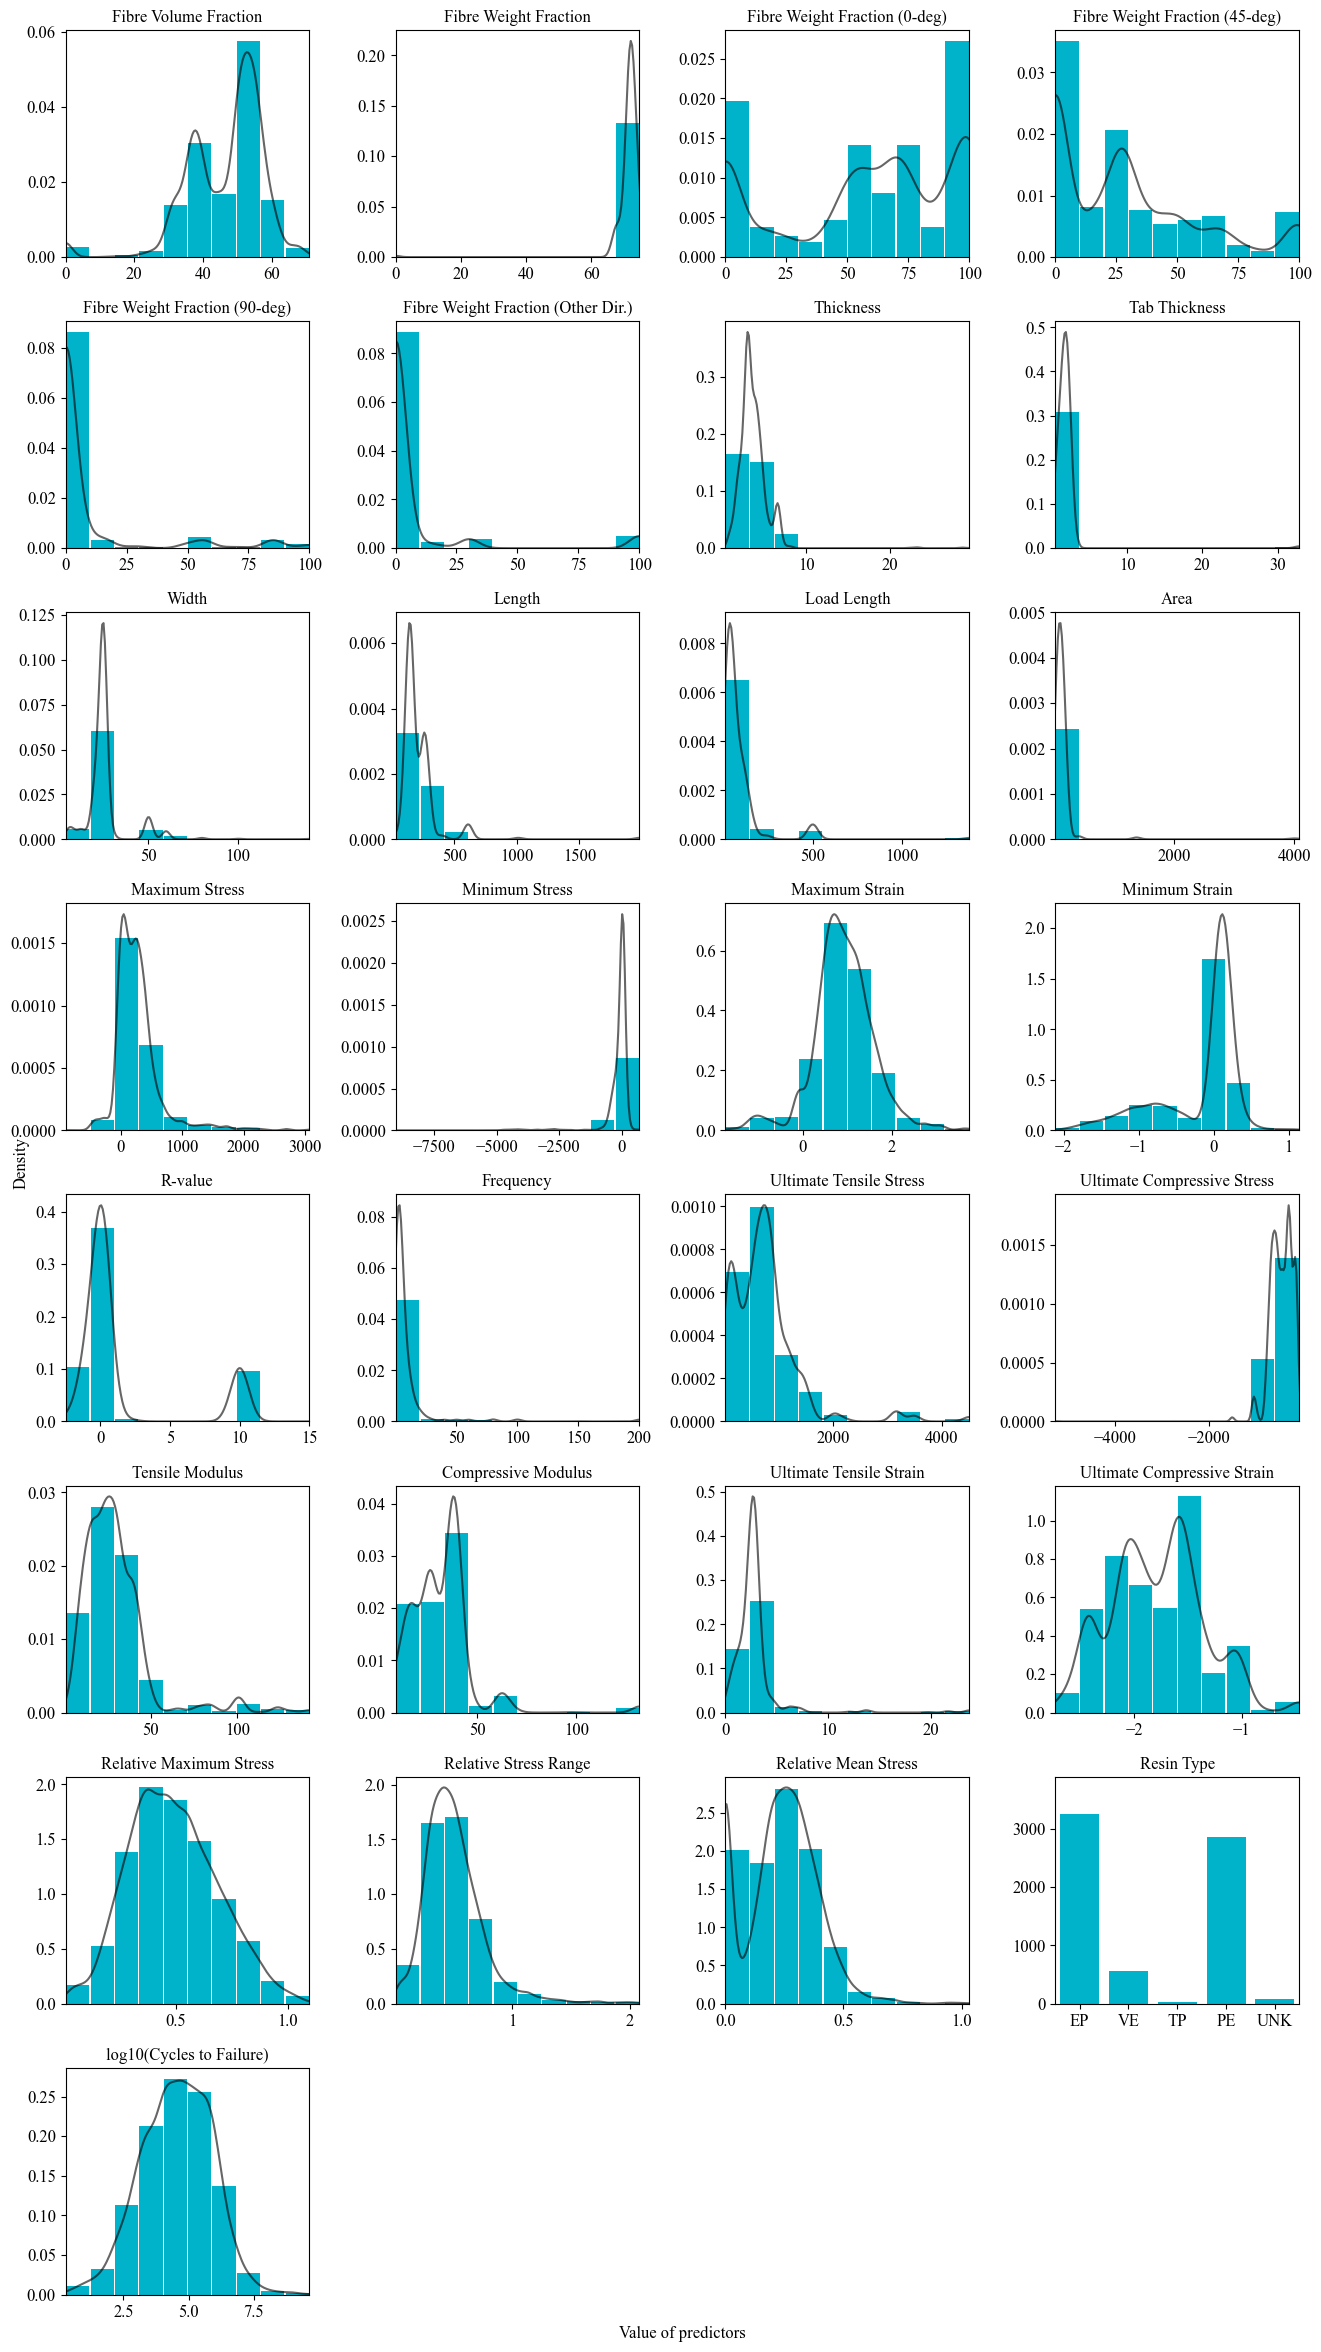

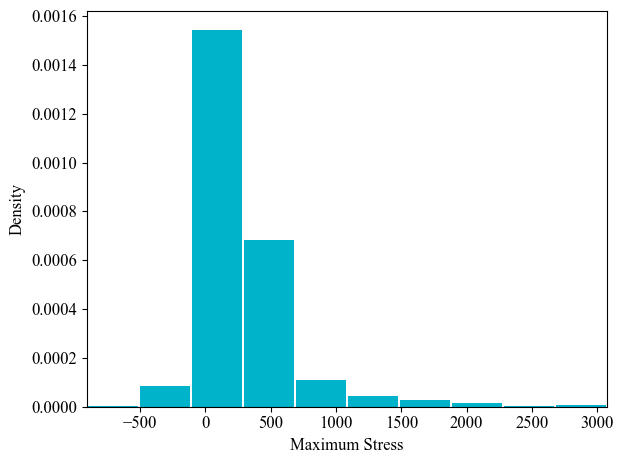

<AxesSubplot:xlabel='Maximum Stress', ylabel='Density'>

In [9]:
from tabensemb.utils.utils import global_palette, global_marker

trainer.plot_hist_all(imputed=False, kde=True, kde_kwargs=dict(kdeplot_kwargs=dict(color="k", alpha=0.6, zorder=10)))
trainer.plot_hist(feature="Maximum Stress", imputed=False)

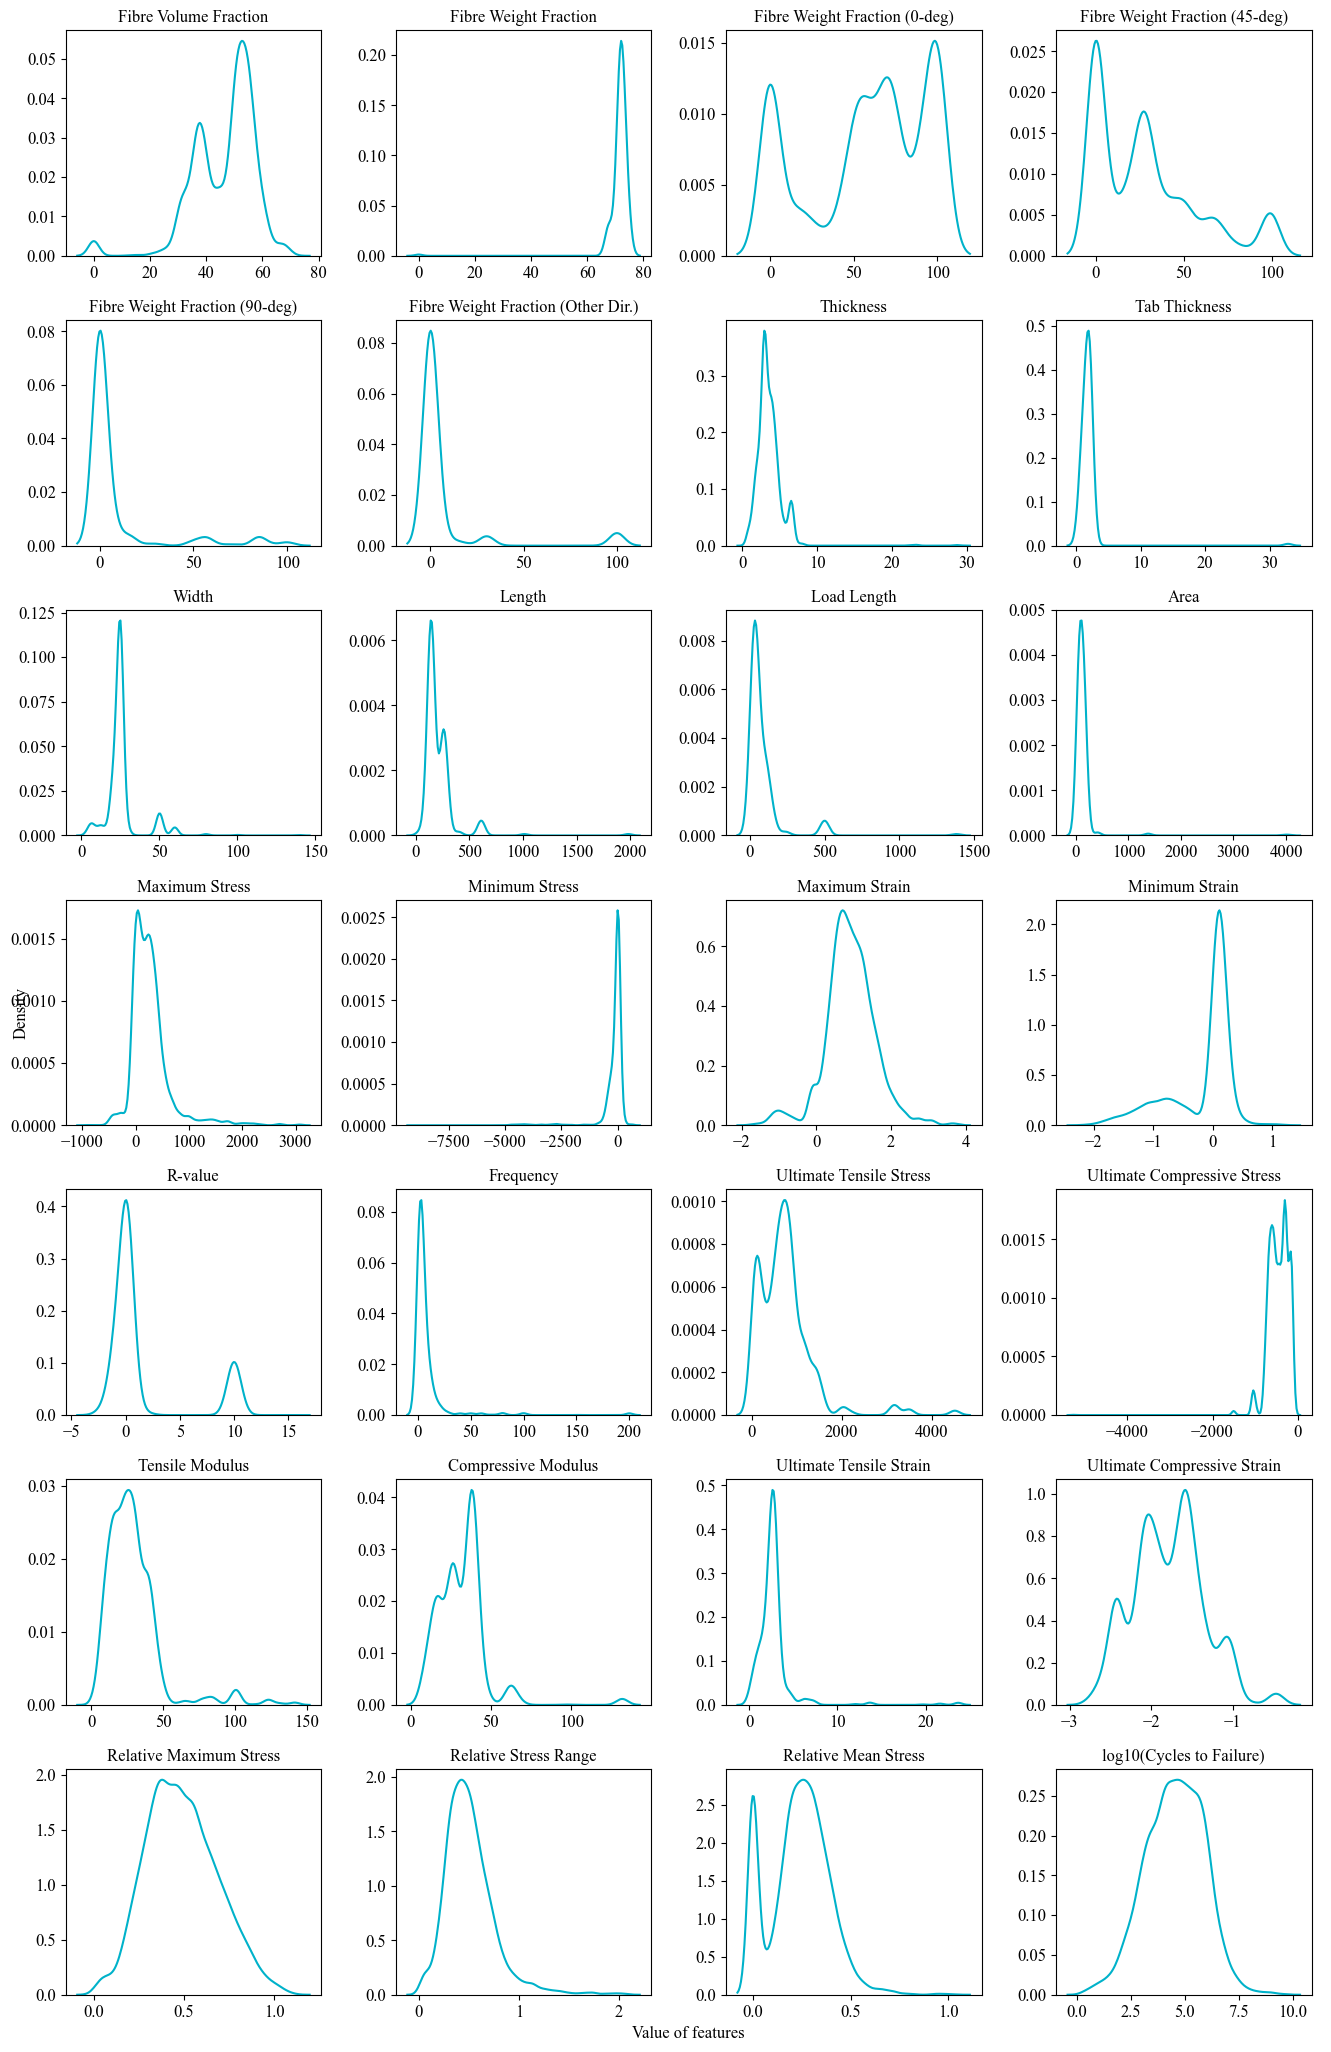

In [10]:
_ = trainer.plot_kde_all(imputed=False)

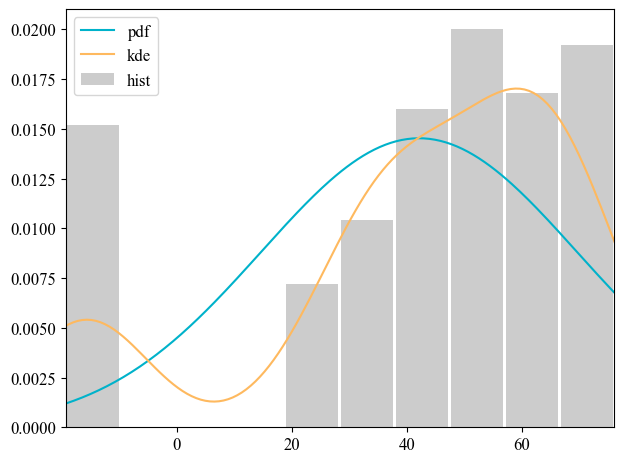

<AxesSubplot:>

In [11]:
trainer.plot_on_one_axes(
    meth_name=["plot_hist", "plot_pdf", "plot_kde"],
    meth_kwargs_ls=[
        dict(
            feature="Maximum Stress",
            select_by_value_kwargs={
                "selection": {"Material_Code": "MD-P2B[±45/(90)4C]S"}
            },
            hist_kwargs={"color": "k", "alpha": 0.2, "label": "hist"},
            imputed=False,
        ),
        dict(
            feature="Maximum Stress",
            imputed=False,
            select_by_value_kwargs={
                "selection": {"Material_Code": "MD-P2B[±45/(90)4C]S"}
            },
            plot_kwargs={"color": global_palette[0], "label": "pdf"},
        ),
        dict(
            feature="Maximum Stress",
            imputed=False,
            select_by_value_kwargs={
                "selection": {"Material_Code": "MD-P2B[±45/(90)4C]S"}
            },
            kdeplot_kwargs={"color": global_palette[1], "label": "kde"},
        ),
    ],
    legend=True,
)

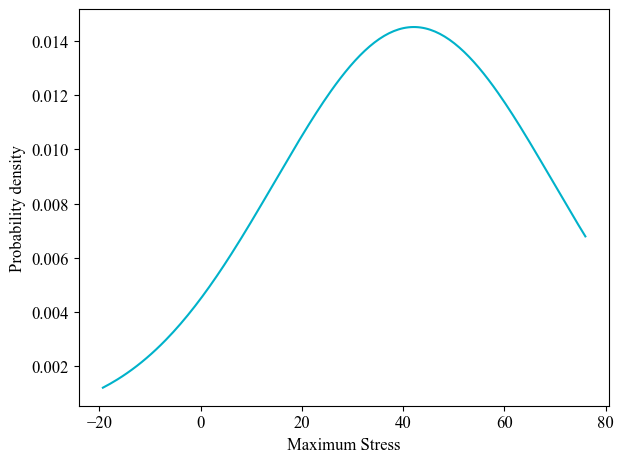

<AxesSubplot:xlabel='Maximum Stress', ylabel='Probability density'>

In [12]:
trainer.plot_pdf(
    feature="Maximum Stress",
    select_by_value_kwargs={"selection": {"Material_Code": "MD-P2B[±45/(90)4C]S"}},
    imputed=False,
)

## Correlation

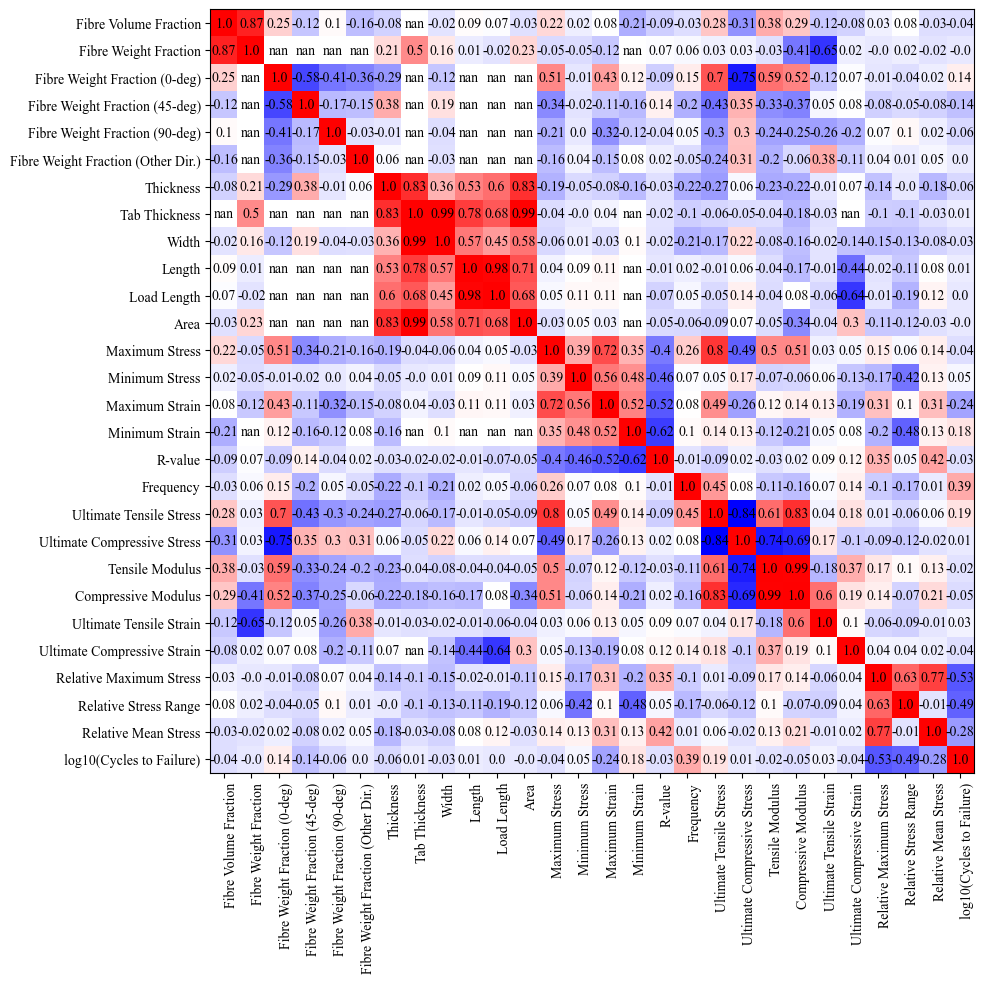

<AxesSubplot:>

In [13]:
trainer.plot_corr(imputed=False)

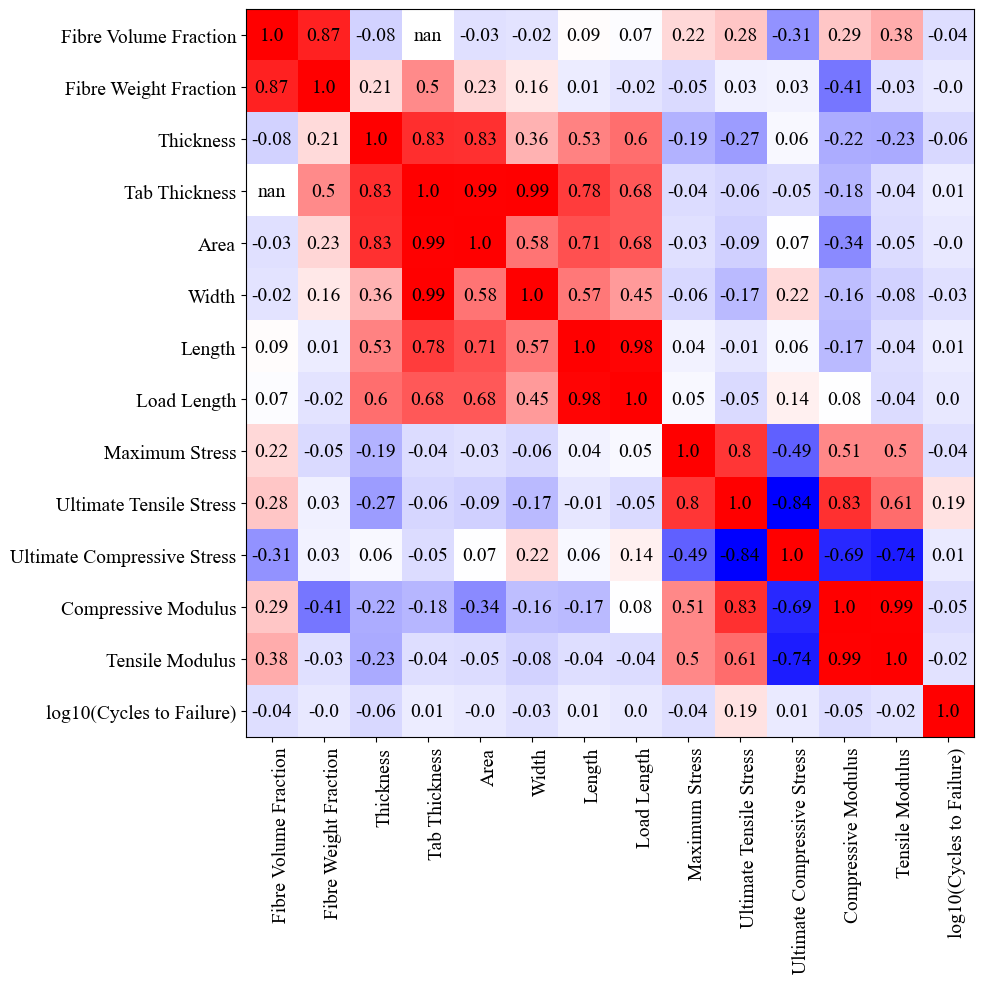

<AxesSubplot:>

In [14]:
import numpy as np
from tabensemb.data.utils import get_corr_sets

corr = trainer.datamodule.cal_corr(imputed=False, features_only=True).abs()
corr_names = get_corr_sets(np.where(corr>0.8), trainer.cont_feature_names)[0]
trainer.plot_corr(fontsize=14, features=corr_names, include_label=True, imputed=False)

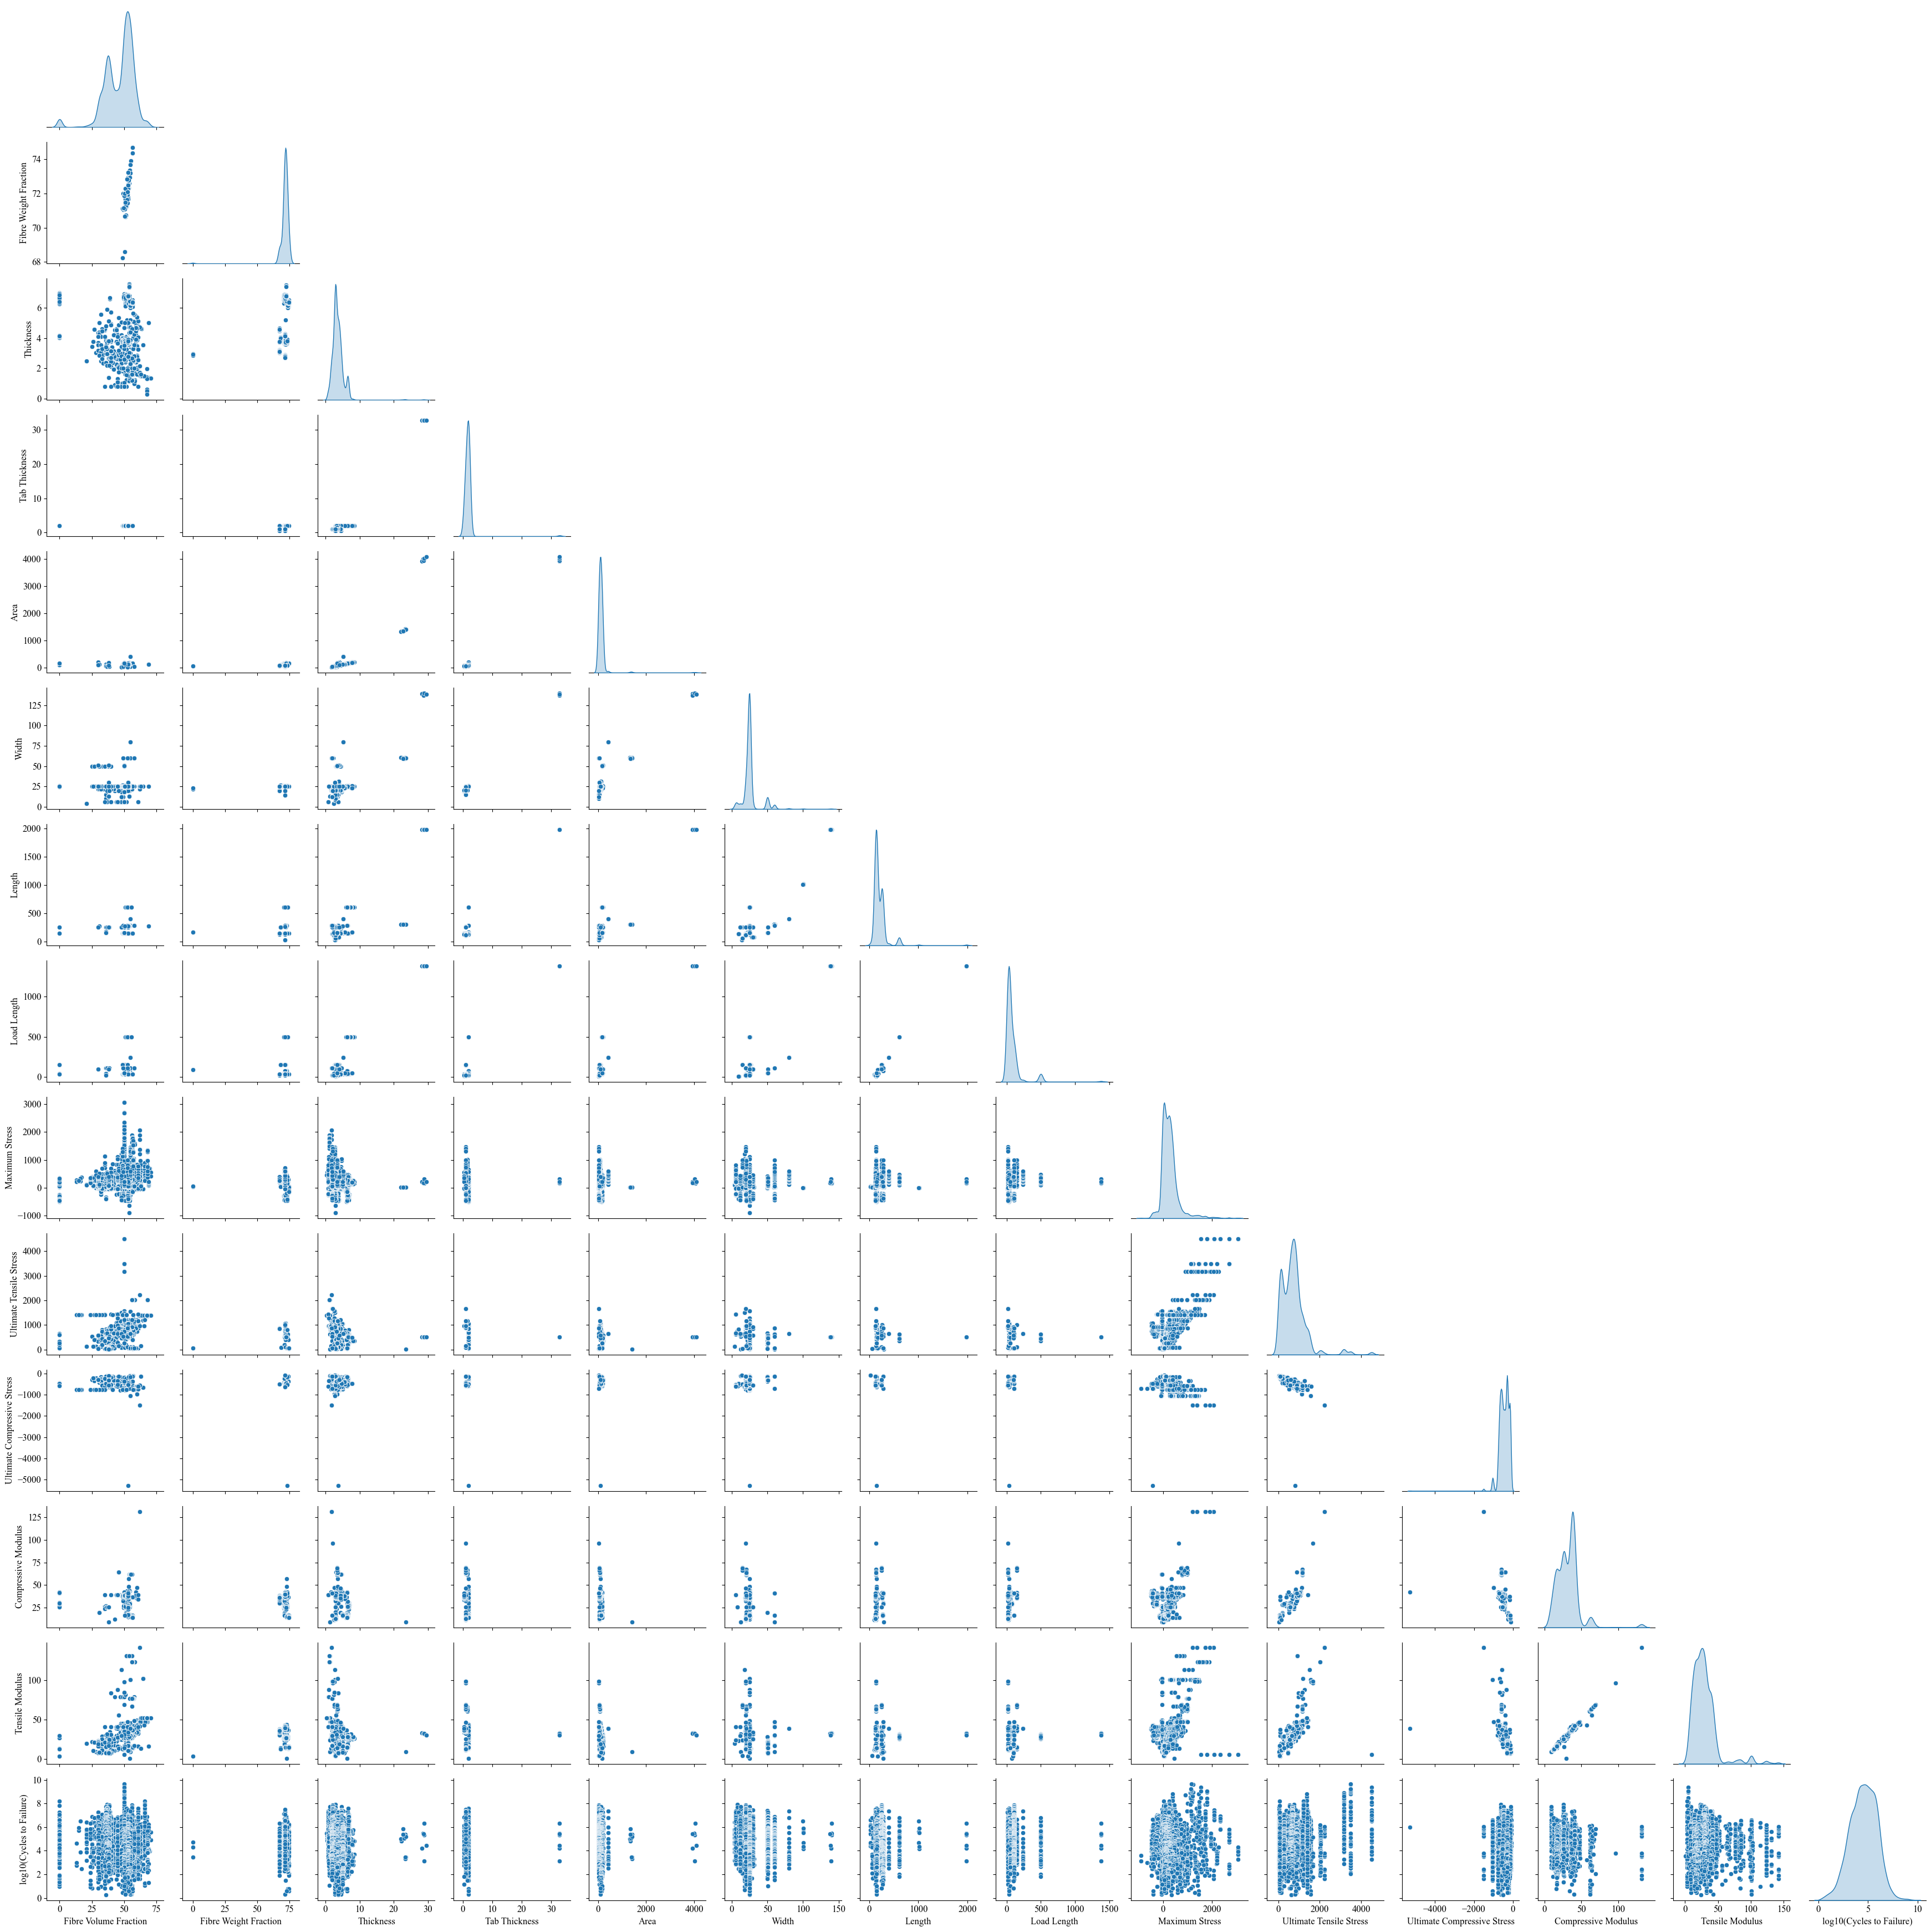

In [15]:
trainer.plot_pairplot(features=corr_names, imputed=False, include_label=True)

## Outliers

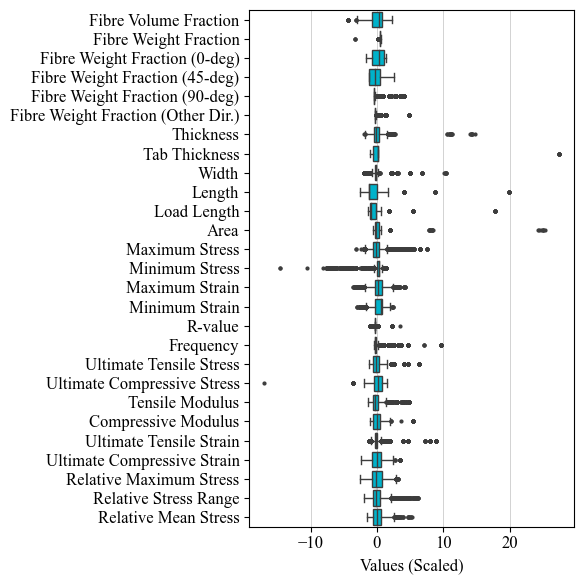

<AxesSubplot:xlabel='Values (Scaled)'>

In [16]:
trainer.plot_feature_box(imputed=False)

# Analyse results

In [17]:
from tabensemb.model import PytorchTabular, CatEmbed
models = [
    PytorchTabular(trainer, model_subset=["Category Embedding"]),
    CatEmbed(trainer, model_subset=["Category Embedding"])
]
trainer.add_modelbases(models)
trainer.train(stderr_to_stdout=True)


-------------Run PytorchTabular-------------

Training Category Embedding
Global seed set to 42
2023-09-19 20:02:23,909 - {pytorch_tabular.tabular_model:473} - INFO - Preparing the DataLoaders
2023-09-19 20:02:23,910 - {pytorch_tabular.tabular_datamodule:290} - INFO - Setting up the datamodule for regression task
2023-09-19 20:02:23,936 - {pytorch_tabular.tabular_model:521} - INFO - Preparing the Model: CategoryEmbeddingModel
2023-09-19 20:02:23,950 - {pytorch_tabular.tabular_model:268} - INFO - Preparing the Trainer
Auto select gpus: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
2023-09-19 20:02:24,817 - {pytorch_tabular.tabular_model:582} - INFO - Training Started
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type                      | Params
---------------------------------------------------------------
0 | _backbone        | CategoryEmbeddingBackbone 

Training MSE Loss: 0.2922, R2: 0.8372
Validation MSE Loss: 0.4284, R2: 0.7739
Testing MSE Loss: 0.4482, R2: 0.7637


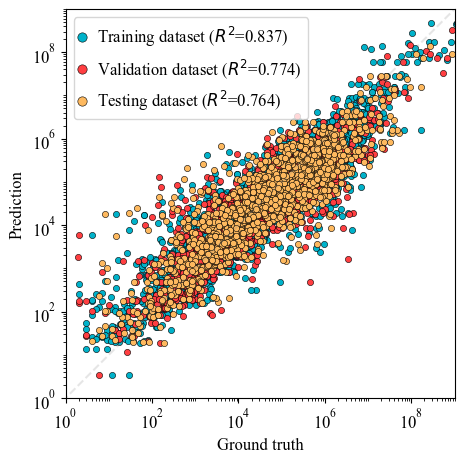

<AxesSubplot:xlabel='Ground truth', ylabel='Prediction'>

In [18]:
trainer.plot_truth_pred(program="PytorchTabular", model_name="Category Embedding")

Calculate PDP:  Fibre Volume Fraction
Calculate PDP:  Fibre Weight Fraction
Calculate PDP:  Fibre Weight Fraction (0-deg)
Calculate PDP:  Fibre Weight Fraction (45-deg)
Calculate PDP:  Fibre Weight Fraction (90-deg)
Calculate PDP:  Fibre Weight Fraction (Other Dir.)
Calculate PDP:  Thickness
Calculate PDP:  Tab Thickness
Calculate PDP:  Width
Calculate PDP:  Length
Calculate PDP:  Load Length
Calculate PDP:  Area
Calculate PDP:  Maximum Stress
Calculate PDP:  Minimum Stress
Calculate PDP:  Maximum Strain
Calculate PDP:  Minimum Strain
Calculate PDP:  R-value
Calculate PDP:  Frequency
Calculate PDP:  Ultimate Tensile Stress
Calculate PDP:  Ultimate Compressive Stress
Calculate PDP:  Tensile Modulus
Calculate PDP:  Compressive Modulus
Calculate PDP:  Ultimate Tensile Strain
Calculate PDP:  Ultimate Compressive Strain
Calculate PDP:  Relative Maximum Stress
Calculate PDP:  Relative Stress Range
Calculate PDP:  Relative Mean Stress
Calculate PDP:  Resin Type


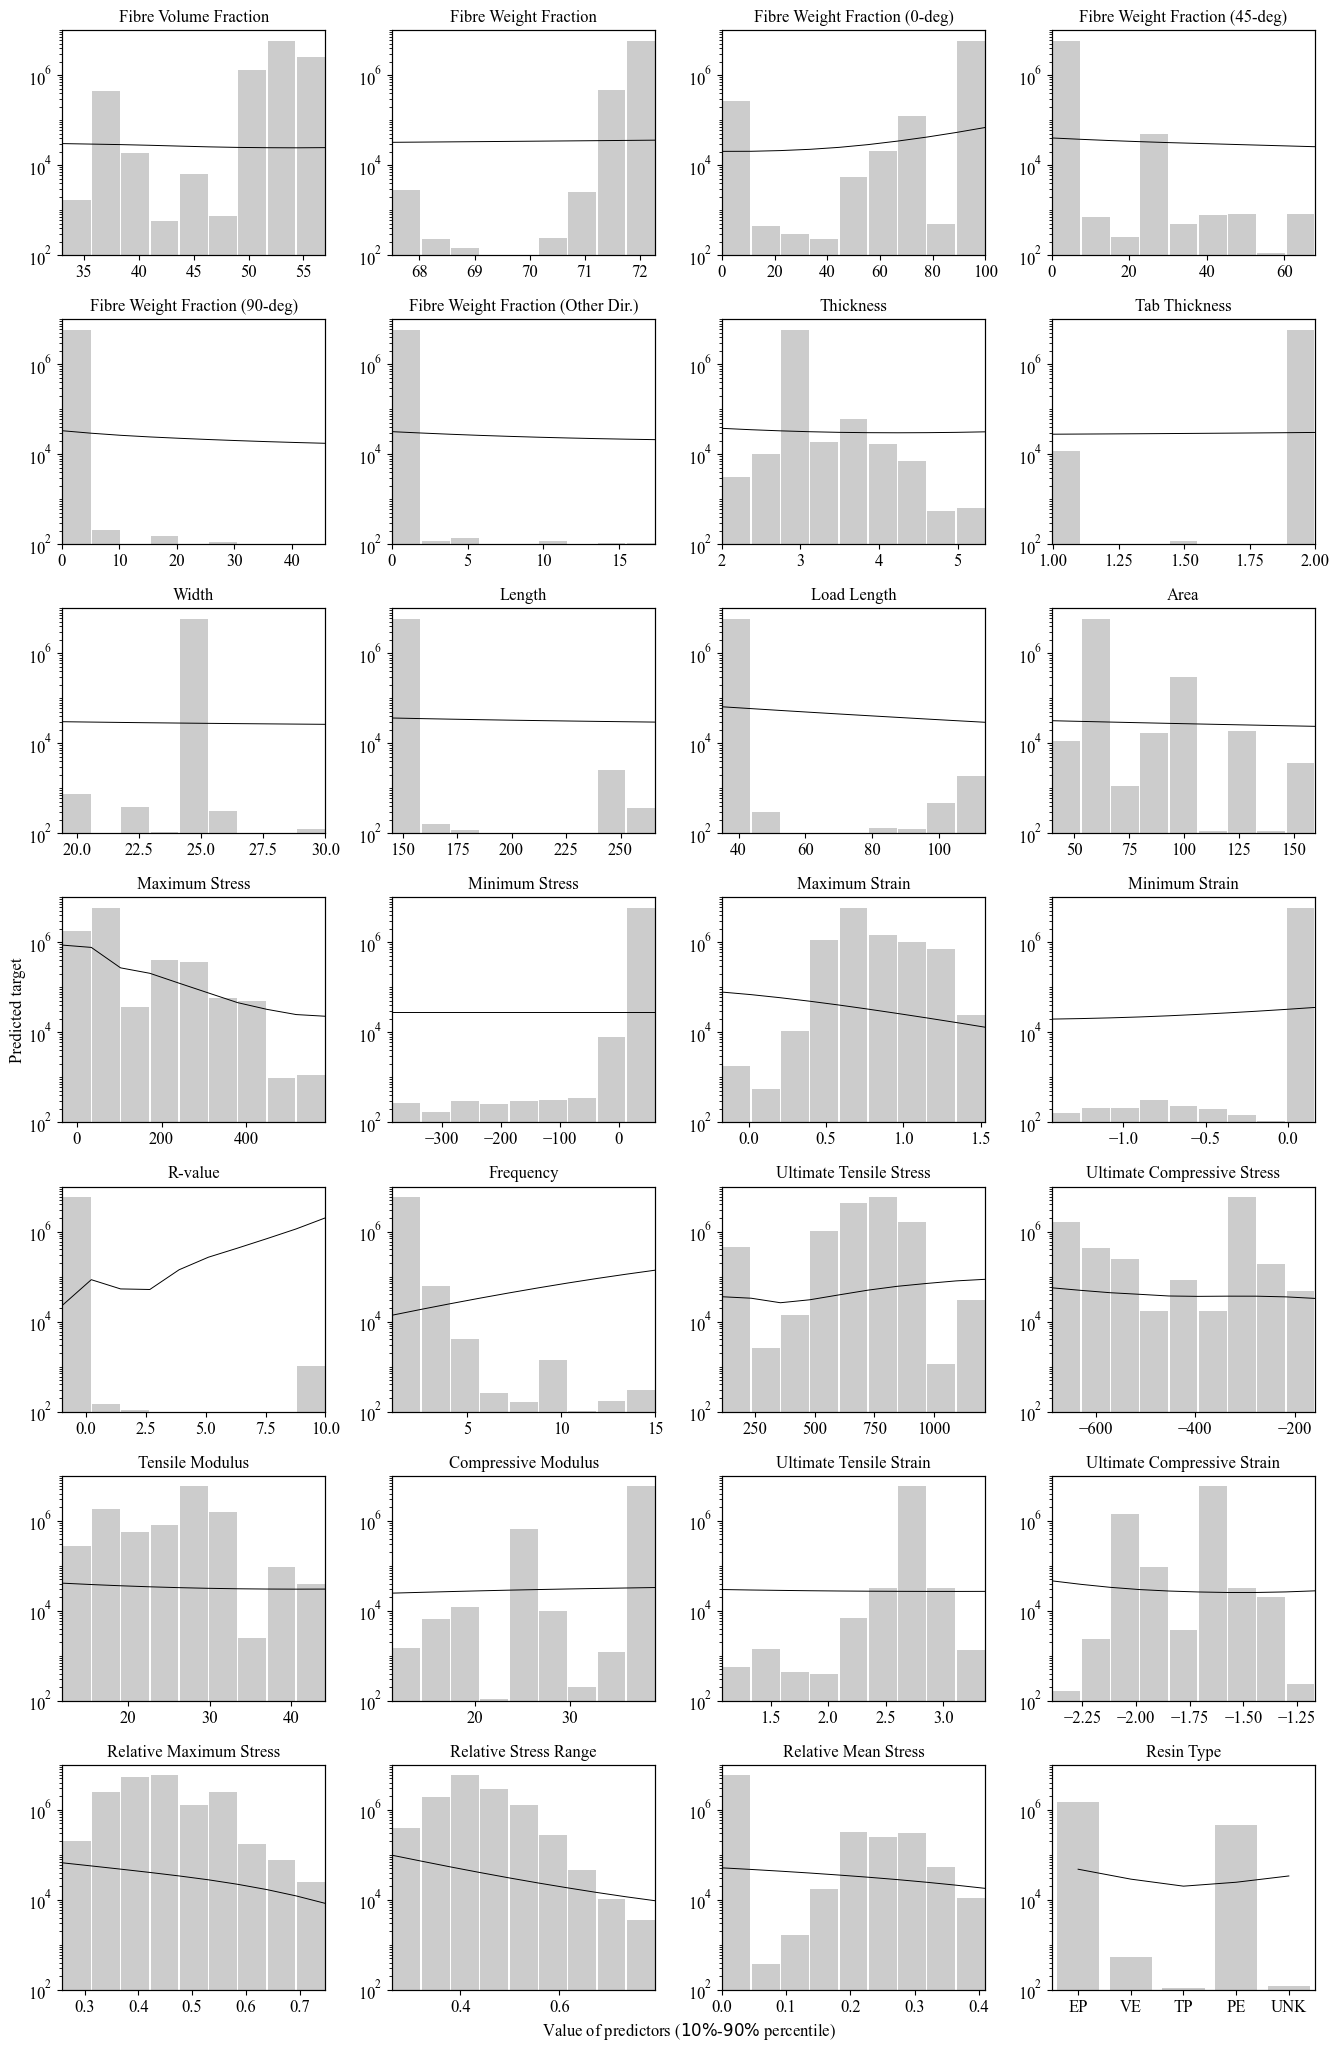

In [19]:
_ = trainer.plot_partial_dependence_all(
    program="PytorchTabular", model_name="Category Embedding", refit=False, grid_size=10
)

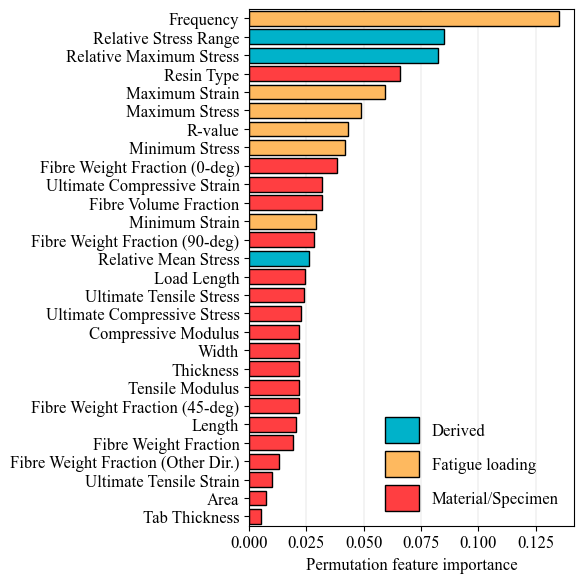

<AxesSubplot:xlabel='Permutation feature importance'>

In [20]:
trainer.plot_feature_importance(
    program="PytorchTabular", model_name="Category Embedding", method="permutation", figure_kwargs={"figsize": (6, 6)}
)

shap.DeepExplainer cannot handle categorical features because their gradients (as float dtype) are zero, and integers can not require_grad. If shap values of categorical values are needed, pass `call_general_method=True` to use shap.KernelExplainer.


Feature importance less than 1e-5: ['Lay-up Sequence-0', 'Lay-up Sequence-1', 'Lay-up Sequence-10', 'Lay-up Sequence-11', 'Lay-up Sequence-12', 'Lay-up Sequence-13', 'Lay-up Sequence-14', 'Lay-up Sequence-15', 'Lay-up Sequence-16', 'Lay-up Sequence-17', 'Lay-up Sequence-18', 'Lay-up Sequence-19', 'Lay-up Sequence-2', 'Lay-up Sequence-20', 'Lay-up Sequence-21', 'Lay-up Sequence-22', 'Lay-up Sequence-23', 'Lay-up Sequence-24', 'Lay-up Sequence-25', 'Lay-up Sequence-26', 'Lay-up Sequence-27', 'Lay-up Sequence-28', 'Lay-up Sequence-29', 'Lay-up Sequence-3', 'Lay-up Sequence-30', 'Lay-up Sequence-31', 'Lay-up Sequence-32', 'Lay-up Sequence-33', 'Lay-up Sequence-34', 'Lay-up Sequence-35', 'Lay-up Sequence-4', 'Lay-up Sequence-5', 'Lay-up Sequence-6', 'Lay-up Sequence-7', 'Lay-up Sequence-8', 'Lay-up Sequence-9', 'Number of Layers', 'Resin Type', 'Unscaled-0', 'Unscaled-1', 'Unscaled-10', 'Unscaled-11', 'Unscaled-12', 'Unscaled-13', 'Unscaled-14', 'Unscaled-15', 'Unscaled-16', 'Unscaled-17', 

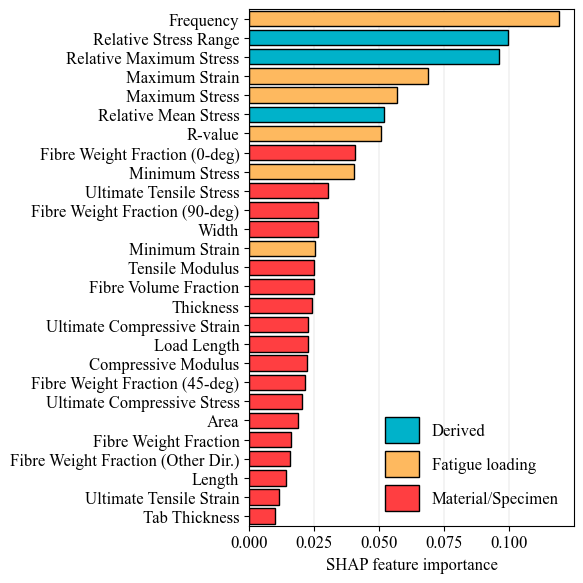

In [21]:
from tabensemb.utils import HiddenPrints, PlainText
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", module="numba")
    warnings.filterwarnings("ignore", module="torch")
    warnings.filterwarnings("ignore", module="shap")
    trainer.plot_feature_importance(
        program="CatEmbed", model_name="Category Embedding", method="shap", figure_kwargs={"figsize": (6, 6)}
    )